

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento


---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins 

Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Nós já temos uma idéia dos agrupamentos.

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris = iris.drop(['species'], axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria** 

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

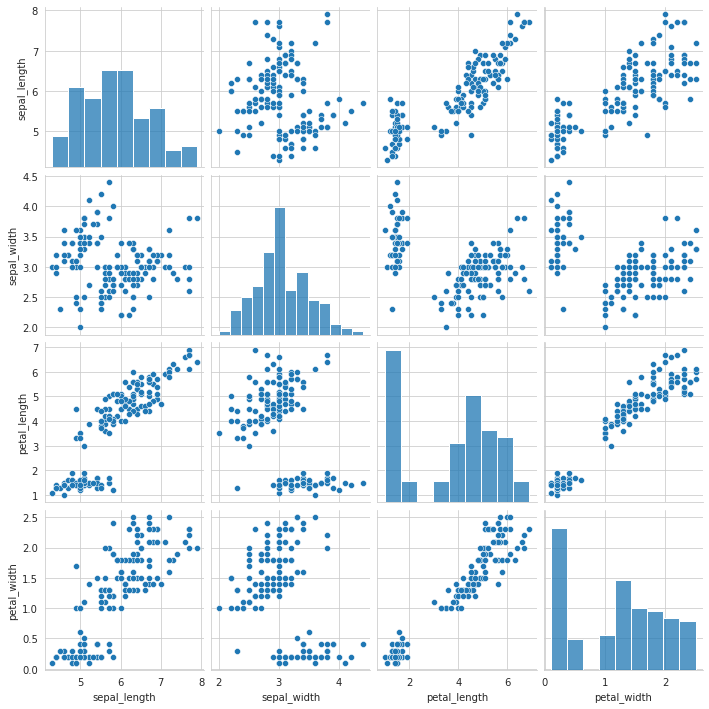

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, palette="pastel")

**Comentário:** Apesar de muitas flores terem informações semelhantes entre si, há claramente grupos que se separam do resto. Por exemplo no gráfico petal_lengthxpetal_width, há um pequeno grupo isolado no canto inferior esquerdo, simbolizando que provavelmente essa é uma espécie isolada, enquanto que as outras se misturam no gráfico. 
Em todo os gráficos há um grupo isolado e baseado nessas características distintas podemos dizer que esse grupo é uma espécie de flor isolada do resto do gráfico.

## 2\. Dados 

### **2.1. Valores nulos** 

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [6]:
# resposta da questão 2.1

iris.info()  #-> 150 entries, todas preenchidas. Logo sem valor nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### **2.2. Variáveis numéricas** 

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2

#não há necessidade, uma vez que não faremos regressão para esse Aprendizado de Máquina e sim Agrupamento.
#Nós iremos criar uma variável resposta, pois no modelo de Agrupamento ele não existe.

### **2.3. Limpeza** 

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*". 

In [ ]:
# resposta da questão 2.3

#sem necessidade

## 3\. Modelagem 

### **3.1. Treino** 

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [7]:
# resposta da questão 3.1

from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
  model = KMeans(n_clusters=k)
  model = model.fit(iris)
  wcss.append(model.inertia_)



### **3.2. Avaliação** 

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

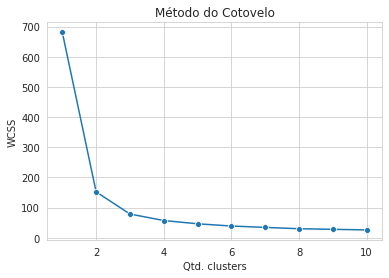

In [9]:
# resposta da questão 3.2

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Qtd. clusters');

#segundo o gráfico, ficamos entre 2, 3 e 4 clusters  

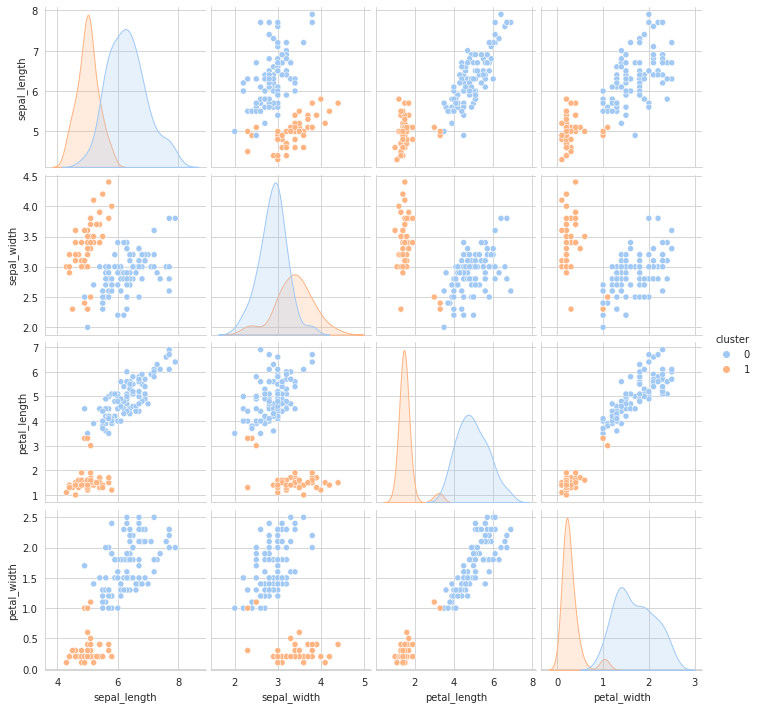

In [10]:
#Para 2 clusters

model = KMeans(n_clusters=2)
model = model.fit(iris)

clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

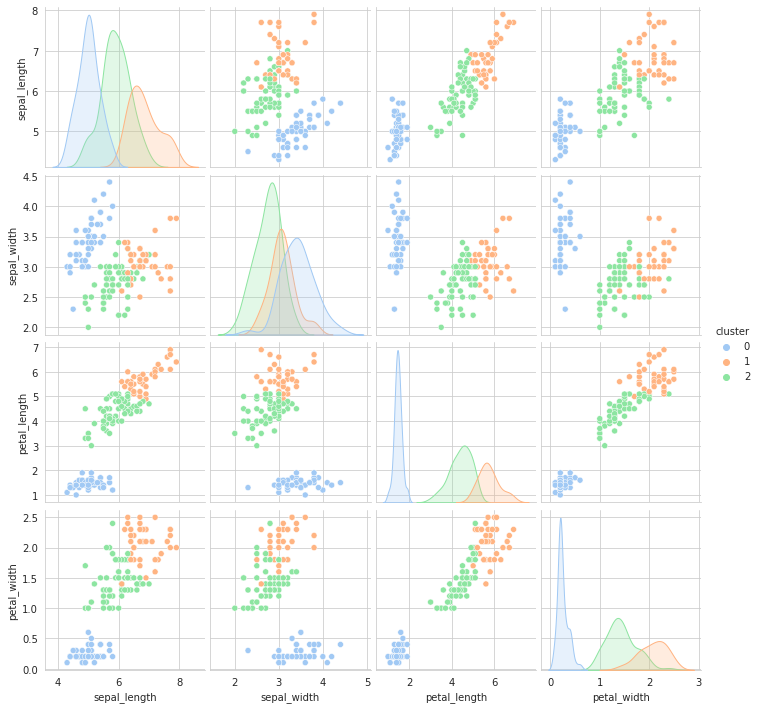

In [11]:
#Para 3 clusters

model = KMeans(n_clusters=3)
model = model.fit(iris)

clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

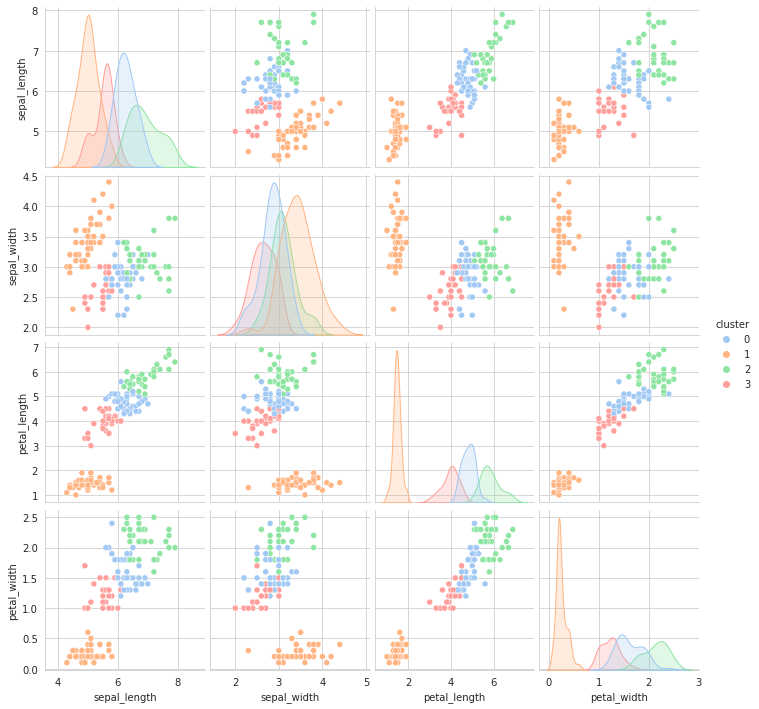

In [12]:
#Para 4 clusters

model = KMeans(n_clusters=4)
model = model.fit(iris)

clusters = model.labels_
clustered_data = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=clustered_data, hue='cluster', palette="pastel")

O ideal é clusters = 3

### **3.3. Visualização** 

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [13]:
# resposta da questão 3.3.a

model = KMeans(n_clusters=3)
model = model.fit(iris)

clusters = model.labels_
iris = pd.concat([iris, pd.DataFrame(clusters, columns=['cluster'])], axis=1)

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

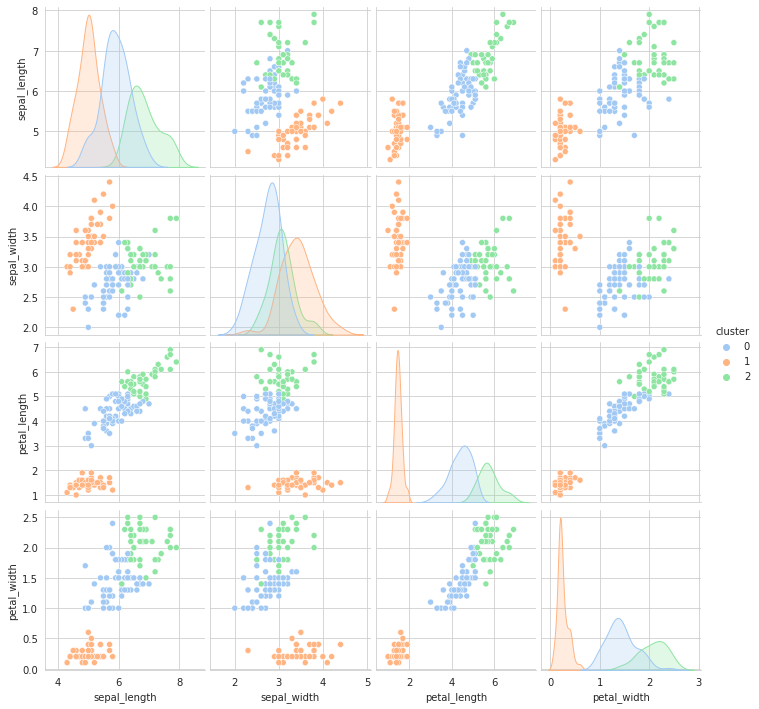

In [14]:
# resposta da questão 3.3.b

with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=iris, hue='cluster', palette="pastel")

**Comentário:** Com os clusters ficou claro que os grupos isolados mencionados no exercício 1.1 ficaram como Closters próprios, indicando que são uma espécie. 

## 4\. Predição  

### **4.1. Nova flor** 

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [15]:
# resposta da questão 4.1

planta = np.array([5.1, 3.5, 1.4, 0.2])

cluster = model.predict(planta.reshape(1, -1))
print(cluster)

[1]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


---